In [1]:
  # packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Generates a signal of 0 and 1 that is num_cycles long
# @param num_cycle the length of the signal
# @return a tuple of the signals and schedule, schedule says how long a bit at the corresponding point in signals is active
# Example: a return of [1,1,0], [2,2,1] would indicate that the first bit (1) in signals is active for two cycles and the second bit (0) is active for one
def generate_signals(num_cycle, rate_max=1):
  signals = np.array([])

  # for simplicity now
  schedule = np.array([])

  i = 0
  while i < num_cycle:
    # 0 or 1, depending on what the sender is sending
    curr_bit = np.random.randint(low=0,high=2)
    # rate is how long a certain bit will be active for, before going to the next one
    rate = np.random.randint(low=rate_max,high=rate_max+20) # not include 21, only 1 to 20

    # if chosen length takes you past the total length, turn it down so there is not any extra
    # if not, keep same as chosen
    if i + rate > num_cycle:
      repeat_time = num_cycle - i
    else:
      repeat_time = rate

    # for the amount of repeat_time (rate if it is able, until the end if not), append corresponding schedule and rate values
    for _ in range(repeat_time):
      signals = np.append(signals, curr_bit)
      schedule = np.append(schedule, rate)
      i = i + 1
  return signals, schedule


In [3]:
np.sum(np.equal(np.array([1,2,0]), np.array([1,1,1])))

1

In [4]:
np.any(np.array([1,2,0]) == 1)

True

In [5]:
jammer_sig, jamer_sch = generate_signals(100) # jammer
jammer_sig, jamer_sch

(array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 3.,  3.,  3.,  2.,  2., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 14., 14., 14., 14., 14.,
        14., 14., 14., 14., 14., 14., 14., 14., 14., 19., 19., 19., 19.,
        19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
        19., 19.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 18., 18., 18., 18.,
        18., 18., 18., 18., 18., 18., 1

In [6]:
sender_sig, sender_sch = generate_signals(100) # sender
sender_sig, sender_sch

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 14., 14., 14., 14.,
        14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 11., 11., 11.,
        11., 11., 11., 11., 11., 11., 11., 11., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 14., 14.,
        14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 19.,
        19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
        19., 19., 19., 19., 19., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 15., 15., 15., 15., 1

In [7]:
jammer_sig + sender_sig

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
# Assume we know the number of jammers plus only 1 sender

# Or maybe we can infer the number of jammers based on the amplitude of received signals?
def approx_signals_3(received_signals, schedule, num_jammer=1):
  signals = np.zeros(shape=received_signals.shape,dtype=int)
  
  # based on schedule
  
  # where to jump to after processing current bit
  next_idx = int(schedule[0])

  # how big the current bit is, use this for error correction
  window_size = schedule[0]

  i = 0
  while i < len(received_signals):
    if i >= next_idx:
      next_idx = int(next_idx + int(schedule[i]))
      window_size = schedule[i]

      # handle the edge case
      if next_idx > len(received_signals):
        next_idx = len(received_signals)
        window_size = len(received_signals) - i

    # two cases for one constant signal
    if np.any(received_signals[i:next_idx] == 0):
      # jammer 0 + sender 0 = 0
      signals[i:next_idx] = 0
      i = next_idx

    # num of jammer + 1 sender
    elif np.any(received_signals[i:next_idx] == num_jammer +1):
      # jammer 1 + sender 1 = 2
      signals[i:next_idx] = 1
      i = next_idx

    else:
      # cumulative average https://en.wikipedia.org/wiki/Moving_average
      avg_signal = np.sum(received_signals[i:next_idx]) / window_size

      if avg_signal >= ((0 + num_jammer+1)/2):
        # jammer might send 1 since higher average
        signals[i:next_idx] = 1
        i = next_idx
      else:
        # jammer might send 0 since lower average
        signals[i:next_idx] = 0
        i = next_idx
  return signals

In [9]:
def run_fixed_max_rate(num_cycles):
  df = pd.DataFrame({"Time Length":[], "Accuracy":[]})
  time_interval = 10**2
  for i in range(num_cycles):
    # time_interval = np.random.randint(low=50, high=150)
    jammer_signals, _ = generate_signals(time_interval)
    sender_signals, schedule = generate_signals(time_interval)
    received_signals = jammer_signals + sender_signals
    processed_signals = approx_signals_3(received_signals,schedule, num_jammer=1)
    accuracy = np.sum(np.equal(sender_signals, processed_signals)) * 100 / time_interval
    df.loc[len(df)] = {"Time Length":time_interval, "Accuracy":accuracy}

  df.loc[len(df)] = {"Time Length": df["Time Length"].mean(), "Accuracy": df["Accuracy"].mean()}
  return df

df = run_fixed_max_rate(1000)

df.to_csv('random_6_29.csv')

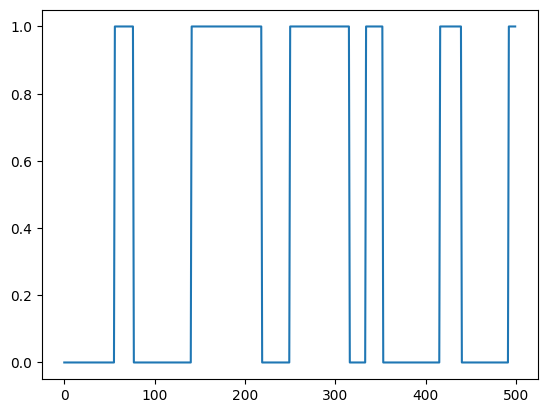

In [10]:
cur_sig, cur_sch = generate_signals(500, 12)

plt.plot(range(0,len(cur_sig)), cur_sig)
plt.show()

In [11]:
# runs for a variable jammer maximum rate
# @param num_runs the number of rns you want to take the average over
# @return the dataframe containing Time Length, Accuracy, and Jammer Max Rate arrays
def run_variable_jammer_rate(num_runs): 
  # init data frame
  df = pd.DataFrame({"Time Length":[], "Accuracy":[], "Jammer Avg Rate":[]})
  all_send = []
  all_jam = []
  time_interval = 10**3
  # get sender signals with set max rate = 21
  sender_signals, schedule = generate_signals(time_interval, 10)
  for i in range(num_runs):
    cur_accuracy = []
    for _ in range(10):

      # get the jammer signals with a certian max rate, determined by current innteration
      jammer_signals, _ = generate_signals(time_interval, i)

      # # get sender signals with set max rate = 21
      # sender_signals, schedule = generate_signals(time_interval, 20)

      # summing the two signals will give the recieved signals
      received_signals = jammer_signals + sender_signals

      # process the recieve through the algorithim
      processed_signals = approx_signals_3(received_signals, schedule, num_jammer=1)

      # determine the accuracy by summing up all the equals over the processed and sent, then taking eprcent
      accuracy = np.sum(np.equal(sender_signals, processed_signals)) * 100 / time_interval

      cur_accuracy.append(accuracy)

    # add the current run to the data frame
    df.loc[len(df)] = {"Time Length":time_interval, "Accuracy":sum(cur_accuracy) / len(cur_accuracy), "Jammer Avg Rate":(i+10)/20}

    all_send.append(sender_signals)
    all_jam.append(jammer_signals)

  # add average statistics
  df.loc[len(df)] = {"Time Length": df["Time Length"].mean(), "Accuracy": df["Accuracy"].mean(), "Jammer Avg Rate": (i+10)/20}
  
  accu = df["Accuracy"]
  stats = {'mean': (accu.mean()), "median": accu.median(), "min": (accu.argmin(), accu.min()), "max": (accu.argmax(), accu.max())}
  return df, stats, all_send, all_jam


In [19]:
# runs for a variable jammer maximum rate
# @param num_runs the number of rns you want to take the average over
# @return the dataframe containing Time Length, Accuracy, and Jammer Max Rate arrays
NUM_JAMMERS = 5

def run_variable_jammer_rate_more_jam(num_runs): 
  # init data frame
  df = pd.DataFrame({"Time Length":[], "Accuracy":[], "Jammer Avg Rate":[]})
  all_send = []
  all_jam = []
  time_interval = 10**3
  # get sender signals with set max rate = 21
  sender_signals, schedule = generate_signals(time_interval, 12)
  for i in range(num_runs):
    cur_accuracy = []
    for _ in range(10):

      # jammer_signals = np.array([])
      jammer_signals = generate_signals(time_interval, i)[0]

      # get the jammer signals with a certian max rate, determined by current innteration
      for _ in range(NUM_JAMMERS-1):
        jammer_signals = jammer_signals + generate_signals(time_interval, i)[0]

      # # get sender signals with set max rate = 21
      # sender_signals, schedule = generate_signals(time_interval, 20)

      # summing the two signals will give the recieved signals
      received_signals = sender_signals + jammer_signals

      # process the recieve through the algorithim
      processed_signals = approx_signals_3(received_signals, schedule, num_jammer=NUM_JAMMERS)

      # determine the accuracy by summing up all the equals over the processed and sent, then taking eprcent
      accuracy = np.sum(np.equal(sender_signals, processed_signals)) * 100 / time_interval

      cur_accuracy.append(accuracy)

    # add the current run to the data frame
    df.loc[len(df)] = {"Time Length":time_interval, "Accuracy":sum(cur_accuracy) / len(cur_accuracy), "Jammer Avg Rate":(i+10)/20}

    all_send.append(sender_signals)
    all_jam.append(jammer_signals)

  # add average statistics
  df.loc[len(df)] = {"Time Length": df["Time Length"].mean(), "Accuracy": df["Accuracy"].mean(), "Jammer Avg Rate": (i+10)/20}
  
  accu = df["Accuracy"]
  stats = {'mean': (accu.mean()), "median": accu.median(), "min": (accu.argmin(), accu.min()), "max": (accu.argmax(), accu.max())}
  return df, stats, all_send, all_jam


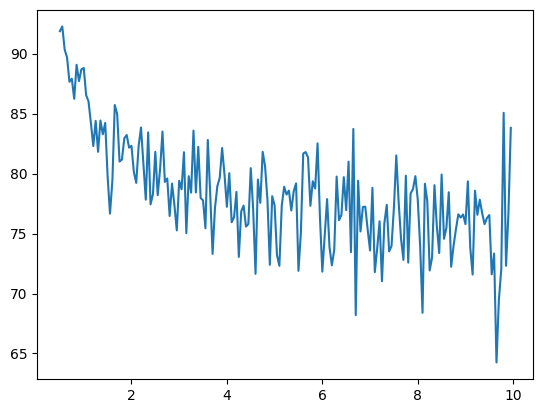

{'mean': 78.37431578947368, 'median': 78.10999999999999, 'min': (183, 64.25), 'max': (1, 92.25999999999999)}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

In [23]:
df, stats, send_sig, jam_sig = run_variable_jammer_rate(190)

plt.plot(df["Jammer Avg Rate"][:-1], df["Accuracy"][:-1])
plt.show()

df.to_csv('variable_jammer_rate_based_on_algorithim.csv')
print(stats)
print(send_sig[stats['min'][0]], jam_sig[stats['min'][0]])
print()
print(send_sig[stats['max'][0]], jam_sig[stats['max'][0]])